This notebook contains cleaning, EDA, visualization and analysis for the 'Corruption Perceptions Index' 
dataset. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as lines
import warnings
import seaborn as sns
warnings.filterwarnings("ignore")

In [2]:
corruption_df = pd.read_csv('./corruption_data/merged_cpi_data.csv')          #drop unused columns
corruption_df = corruption_df.drop(columns = ['Minimum score', 'Maximum score', 'Standard Error',
       '90% Confidence Interval (Higher bound)',
       '90% Confidence Interval (Lower bound)','IFS Code'])
corruption_df

,Year,Country,CPI Score,Rank,Number of Sources,ADB,AfDB,BF_SGI,BF_TI,EIU,...,WEF,WJP,ISO3,Region,WB Code,OECD,G20,BRICS,EU,Arab states
0,2010,Denmark,93.0,1,6,NaN,NaN,NaN,NaN,8.90000,...,9.20000,NaN,DNK,WE/EU,DNK,y,NaN,NaN,y,NaN
1,2010,New Zealand,93.0,1,6,NaN,NaN,NaN,NaN,8.90000,...,9.50000,NaN,NZL,AP,NZL,y,NaN,NaN,NaN,NaN
2,2010,Singapore,93.0,1,9,NaN,NaN,NaN,9.300000,8.90000,...,9.50000,NaN,SGP,AP,SGP,NaN,NaN,NaN,NaN,NaN
3,2010,Finland,92.0,4,6,NaN,NaN,NaN,NaN,8.90000,...,9.10000,NaN,FIN,WE/EU,FIN,y,NaN,NaN,y,NaN
4,2010,Sweden,92.0,4,6,NaN,NaN,NaN,NaN,8.90000,...,9.40000,NaN,SWE,WE/EU,SWE,y,NaN,NaN,y,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1767,2019,Venezuela,16.0,173,8,NaN,NaN,NaN,8.908407,19.79276,...,15.56867,13.12382,VEN,AME,VEN,NaN,NaN,NaN,NaN,NaN
1768,2019,Yemen,15.0,177,7,NaN,NaN,NaN,12.897920,19.79276,...,23.46001,NaN,YEM,MENA,YEM,NaN,NaN,NaN,NaN,y
1769,2019,Syria,13.0,178,5,NaN,NaN,NaN,8.908407,19.79276,...,NaN,NaN,SYR,MENA,SYR,NaN,NaN,NaN,NaN,y
1770,2019,South Sudan,12.0,179,5,NaN,11.191160,NaN,16.887440,NaN,...,NaN,NaN,SSD,SSA,SSD,NaN,NaN,NaN,NaN,NaN


In [3]:
corruption_df.columns

Index(['Year', 'Country', 'CPI Score', 'Rank', 'Number of Sources', 'ADB',
       'AfDB', 'BF_SGI', 'BF_TI', 'EIU', 'FH', 'GI', 'IMD', 'PERC', 'PRS',
       'TI', 'VDP', 'WB', 'WEF', 'WJP', 'ISO3', 'Region', 'WB Code', 'OECD',
       'G20', 'BRICS', 'EU', 'Arab states'],
      dtype='object')

In [4]:
corruption_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1772 entries, 0 to 1771
Data columns (total 28 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               1772 non-null   int64  
 1   Country            1772 non-null   object 
 2   CPI Score          1772 non-null   float64
 3   Rank               1772 non-null   int64  
 4   Number of Sources  1772 non-null   int64  
 5   ADB                46 non-null     float64
 6   AfDB               690 non-null    float64
 7   BF_SGI             630 non-null    float64
 8   BF_TI              1389 non-null   float64
 9   EIU                1403 non-null   float64
 10  FH                 585 non-null    float64
 11  GI                 1765 non-null   float64
 12  IMD                840 non-null    float64
 13  PERC               475 non-null    float64
 14  PRS                1329 non-null   float64
 15  TI                 382 non-null    float64
 16  VDP                588 n

This tells us the total number of times any source has contributed to the CPI score over the years and also how many countries part of various organizations/regions have a reported CPI score over the years.

In [5]:
len(corruption_df.Country.unique())      # number of unique countries in the dataset

191

In [6]:
corruption_df.describe()

,Year,CPI Score,Rank,Number of Sources,ADB,AfDB,BF_SGI,BF_TI,EIU,FH,GI,IMD,PERC,PRS,TI,VDP,WB,WEF,WJP
count,1772.000000,1772.000000,1772.000000,1772.000000,46.000000,690.000000,630.000000,1389.000000,1403.000000,585.000000,1765.000000,840.000000,475.000000,1329.000000,382.000000,588.000000,907.000000,1456.000000,1071.000000
mean,2014.499436,42.442799,87.708804,6.558691,2.621607,15.870655,34.238014,27.898296,35.443292,17.317515,35.270059,34.292430,13.288691,37.188650,8.030640,41.821558,19.049634,37.030664,36.172819
std,2.888967,19.805697,50.794655,1.951255,0.935454,18.222805,35.243183,20.326621,25.927395,22.806060,24.013338,32.232764,24.121397,25.119175,19.714354,20.639756,18.308145,25.766790,25.833672
min,2010.000000,8.000000,1.000000,3.000000,1.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,0.000000,0.000000
25%,2012.000000,28.000000,44.000000,5.000000,2.117112,0.000000,0.000000,6.595013,19.000000,0.000000,11.000000,0.000000,0.000000,21.000000,0.000000,24.000000,1.367659,17.000000,18.000000
50%,2014.000000,37.000000,87.000000,7.000000,2.300000,3.691197,33.000000,28.000000,37.000000,0.000000,34.503290,33.000000,0.000000,32.000000,0.000000,38.690415,18.000000,35.000000,34.000000
75%,2017.000000,55.000000,130.000000,8.000000,2.900000,32.000000,68.750000,40.000000,54.000000,36.000000,52.000000,62.000000,24.500000,50.000000,0.000000,60.854793,35.000000,53.315595,55.000000
max,2019.000000,94.626810,182.000000,13.000000,5.834747,65.000000,99.000000,79.000000,90.000000,77.129290,83.256370,99.000000,92.000000,100.000000,99.000000,78.168110,70.000000,96.000000,90.000000


In [7]:
corruption_df[corruption_df['CPI Score'] == 8][['Year', 'Country']]  #minimum CPI score

,Year,Country
534,2012,Afghanistan
535,2012,North Korea
536,2012,Somalia
711,2013,Afghanistan
712,2013,North Korea
713,2013,Somalia
887,2014,North Korea
888,2014,Somalia
1055,2015,North Korea
1056,2015,Somalia


In [8]:
corruption_df[corruption_df['CPI Score'] == 94.626810][['Year', 'Country']]        #maximum CPI score 

,Year,Country
178,2011,New Zealand


Minimum and maximum CPI scores were 8 for Afghanistan(2012,2013), Somalia(2012,2013,2014,2015), North Korea(2012,2013,2014,2015) and 94.627 for New Zealand(2011) respectively.

In [9]:
corruption_df.isnull().any()

Year                 False
Country              False
CPI Score            False
Rank                 False
Number of Sources    False
ADB                   True
AfDB                  True
BF_SGI                True
BF_TI                 True
EIU                   True
FH                    True
GI                    True
IMD                   True
PERC                  True
PRS                   True
TI                    True
VDP                   True
WB                    True
WEF                   True
WJP                   True
ISO3                  True
Region                True
WB Code               True
OECD                  True
G20                   True
BRICS                 True
EU                    True
Arab states           True
dtype: bool

There are organizations which most countries aren't a part of and also the CPI score for each country is not contributed by all the sources hence there are a null values in the data.

In [10]:
corr_corr = corruption_df[['Year', 'CPI Score', 'Rank', 'Number of Sources']].corr()
corr_corr

,Year,CPI Score,Rank,Number of Sources
Year,1.000000,0.041973,0.002846,0.118654
CPI Score,0.041973,1.000000,-0.954209,0.187059
Rank,0.002846,-0.954209,1.000000,-0.181700
Number of Sources,0.118654,0.187059,-0.181700,1.000000


<AxesSubplot: >

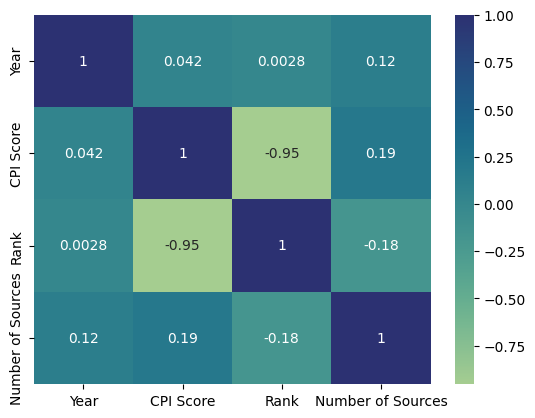

In [11]:
sns.heatmap(corr_corr, annot=True,cmap="crest")

The CPI score is negatively correlated as higher the corruption of the country's public sector, lower(numerically) the rank it gets.

CPI score is not strongly correlated to the year and number of sources the data is collected.

In [12]:
corruption_2010 = corruption_df[corruption_df['Year'] == 2010]
corruption_2019 = corruption_df[corruption_df['Year'] == 2019]

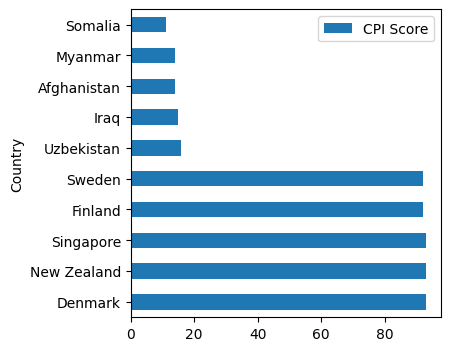

In [13]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 4
fig_size[1] = 4
plt.rcParams["figure.figsize"] = fig_size

#show bar graph
new_df = corruption_2010.head(5)
new_df = new_df.append(corruption_2010.tail(5))
ax_corruption_bar_graph = new_df.plot(x = "Country", y = "CPI Score", kind = 'barh')

We can see that in the year 2010, the top most corrupt countries were Somalia, Myanmar, Afghanistan, Iraq and Uzbekistan. The top most non-corrupt countries were Sweden, Finland, Singapore, New Zealand and Denmark respectively.

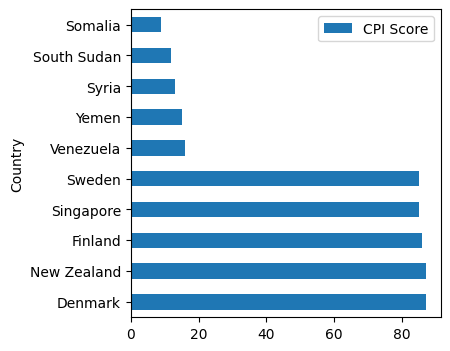

In [14]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 4
fig_size[1] = 4
plt.rcParams["figure.figsize"] = fig_size

#show bar graph
new_df = corruption_2019.head(5)
new_df = new_df.append(corruption_2019.tail(5))
ax_corruption_bar_graph = new_df.plot(x = "Country", y = "CPI Score", kind = 'barh')

In the year 2019, the top most corrupt countries were Somalia, South Sudan, Syria, Yemen and Venezuela. The top most non-corrupt countries were Sweden, Singapore, Finland, New Zealand and Denmark respectively.

Various countries in different organizations on corruption over the years

Text(0.5, 1.0, 'Corruption for G20')

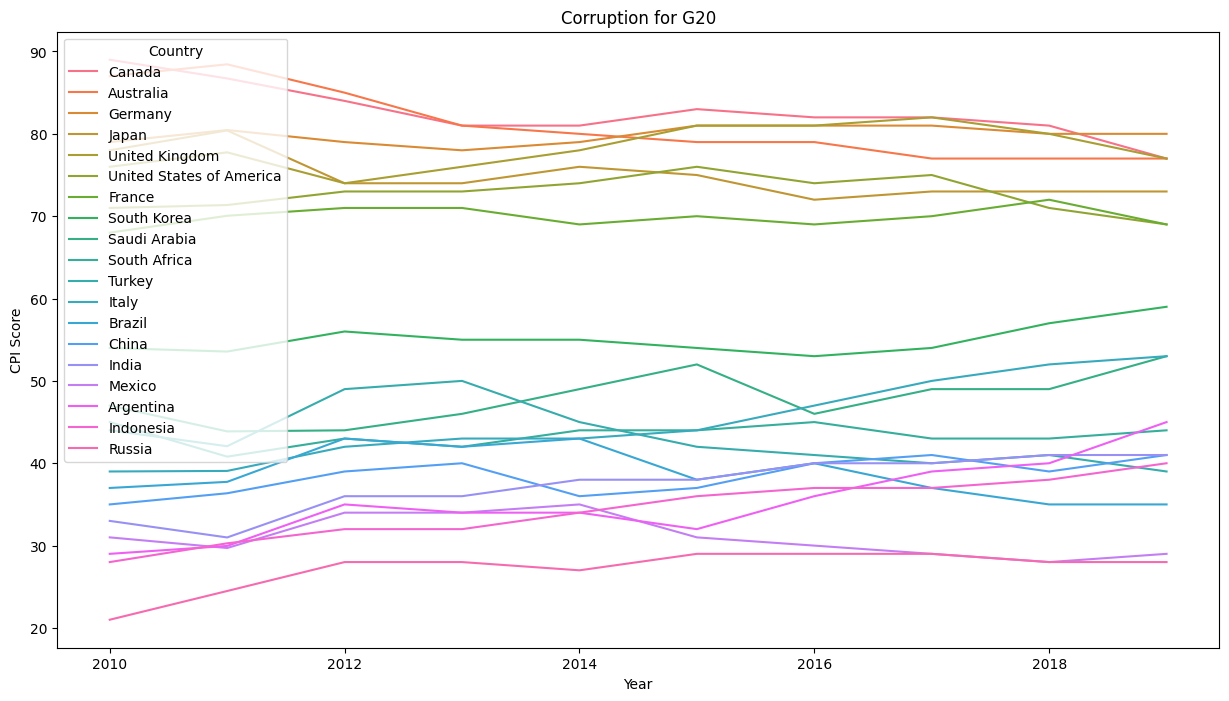

In [15]:
fig = plt.figure(figsize=(15, 8))
data1 = corruption_df[corruption_df["G20"] == 'y'][['Year', 'Country', 'CPI Score']]
sns.lineplot(x='Year', y='CPI Score', hue='Country', data=data1).set_title("Corruption for G20")

Text(0.5, 1.0, 'Corruption for BRICS')

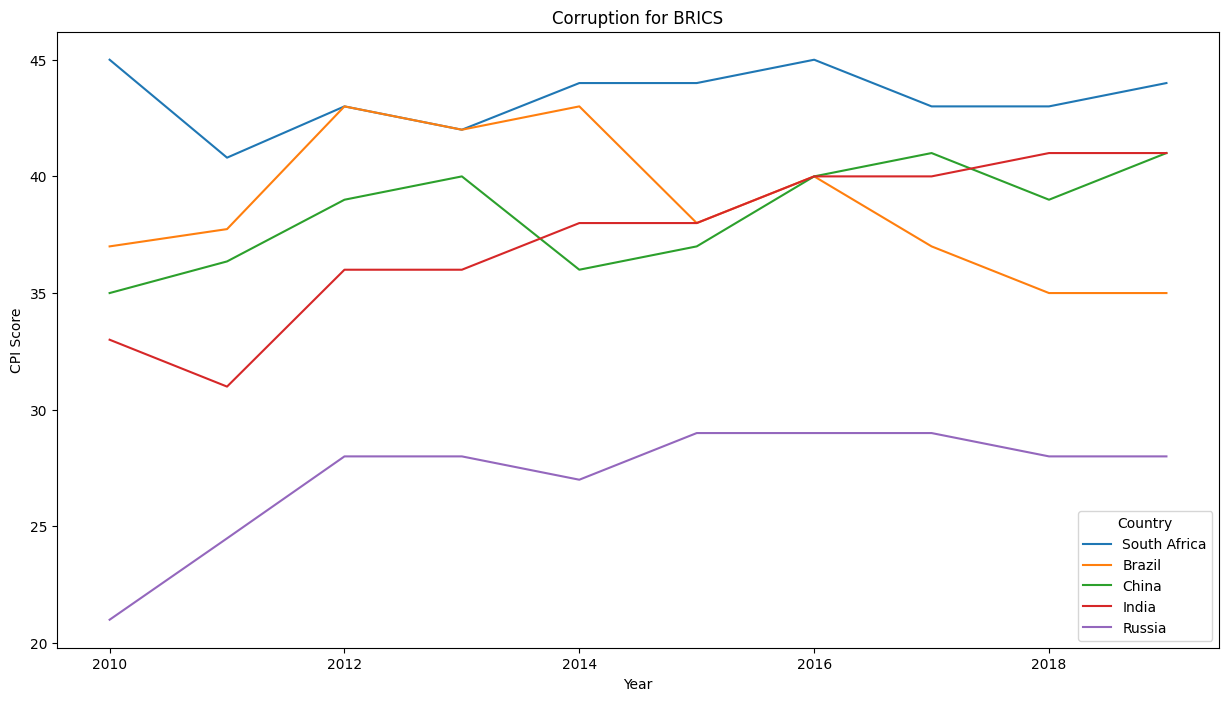

In [16]:
fig = plt.figure(figsize=(15, 8))
data2 = corruption_df[corruption_df["BRICS"] == 'y'][['Year', 'Country', 'CPI Score']]
sns.lineplot(x='Year', y='CPI Score', hue='Country', data=data2).set_title("Corruption for BRICS")

Text(0.5, 1.0, 'Corruption for EU')

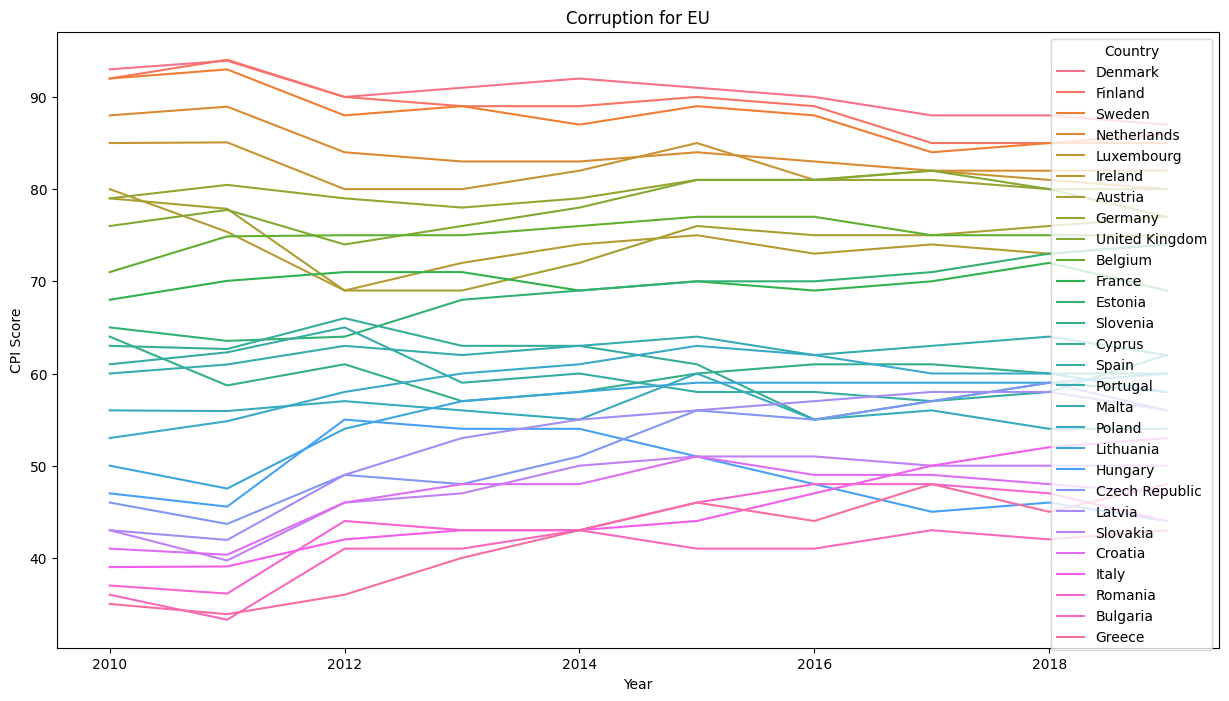

In [17]:
fig = plt.figure(figsize=(15, 8))
data3 = corruption_df[corruption_df["EU"] == 'y'][['Year', 'Country', 'CPI Score']]
sns.lineplot(x='Year', y='CPI Score', hue='Country', data=data3).set_title("Corruption for EU")

Text(0.5, 1.0, 'Corruption for Arab states')

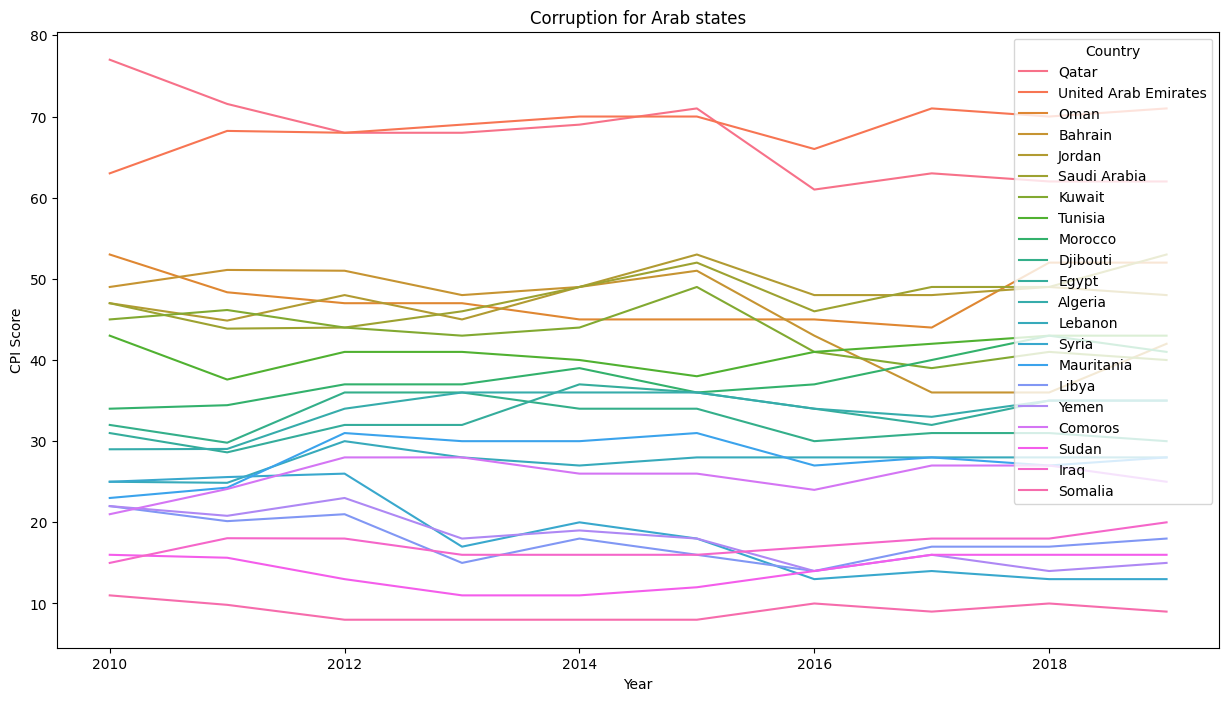

In [18]:
fig = plt.figure(figsize=(15, 8))
data4 = corruption_df[corruption_df["Arab states"] == 'y'][['Year', 'Country', 'CPI Score']]
sns.lineplot(x='Year', y='CPI Score', hue='Country', data=data4).set_title("Corruption for Arab states")

The countries that are part of G20 organization score highly on the corruption index as well as very poorly. Which means that the G20 has countries with clean as well as very corrupt public sectors.

The BRICS one shows that there is a gradual increase in corruption score for most countries. It means that these countries are doing well on their anti-corruption policies. Brazil on the other hand shows decline over the years which means that its public sector has increased corruption.

The European countries are all in the 40-90 range, which means that all of them have achieved some success in fighting corruption.

The Arab states have a score in the range of 10-50 (except 2 countries) & a lot of work is needed to fight & eliminate corruption. They need stricter laws and good implementation to increase their CPI scores.

array([[<AxesSubplot: title={'center': 'CPI Score'}>,
        <AxesSubplot: title={'center': 'Number of Sources'}>]],
      dtype=object)

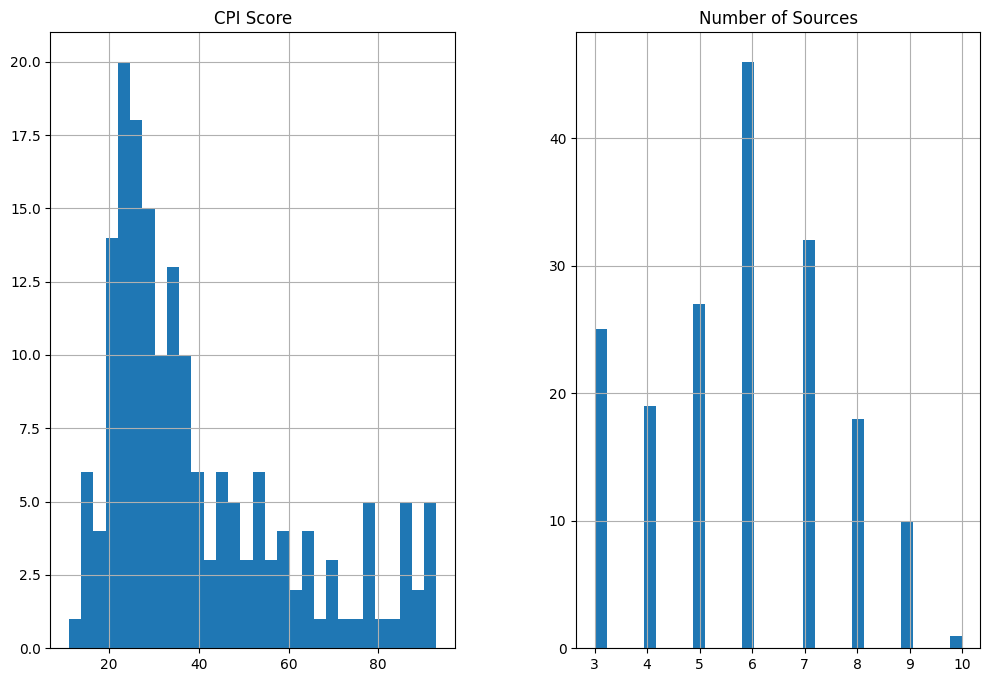

In [19]:
corruption_2010[['CPI Score', 'Number of Sources']].hist(bins=30, figsize=(12,8))

array([[<AxesSubplot: title={'center': 'CPI Score'}>,
        <AxesSubplot: title={'center': 'Number of Sources'}>]],
      dtype=object)

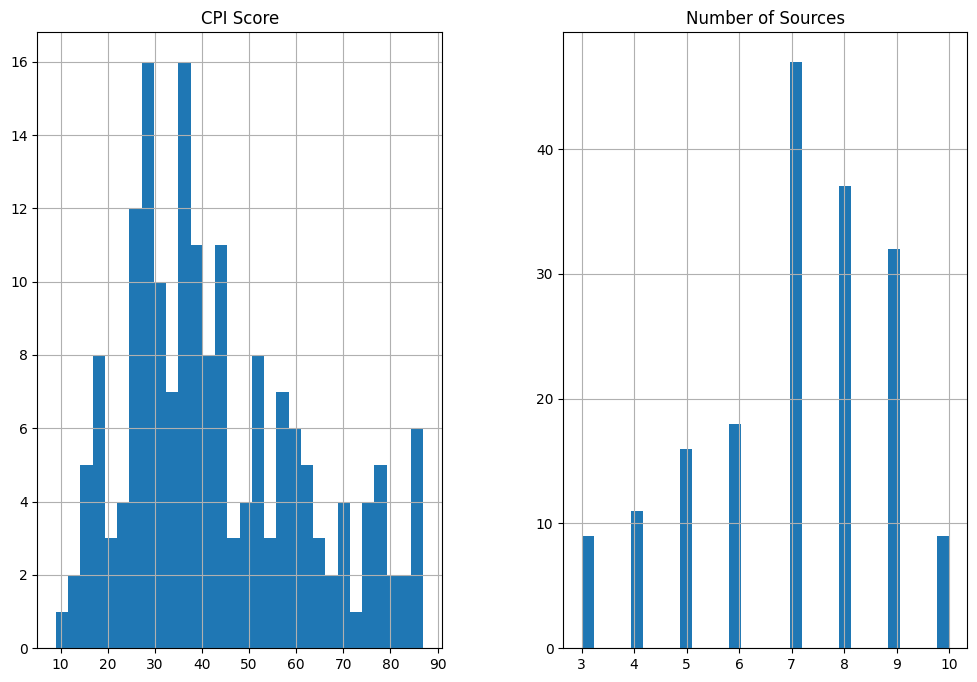

In [20]:
corruption_2019[['CPI Score', 'Number of Sources']].hist(bins=30, figsize=(12,8))

We can see that the number of sources reporting CPI scores for each country has increased from 2010 to 2019. There is also a general increase in the frequency of higher CPI scores which tells us that the trend over the decade has been good in terms of fighting corruption. Most developing countries are implementing laws to get a grasp over corruption in their public sector. 

Corruption by Region

Text(0.5, 1.0, 'Corruption by Region')

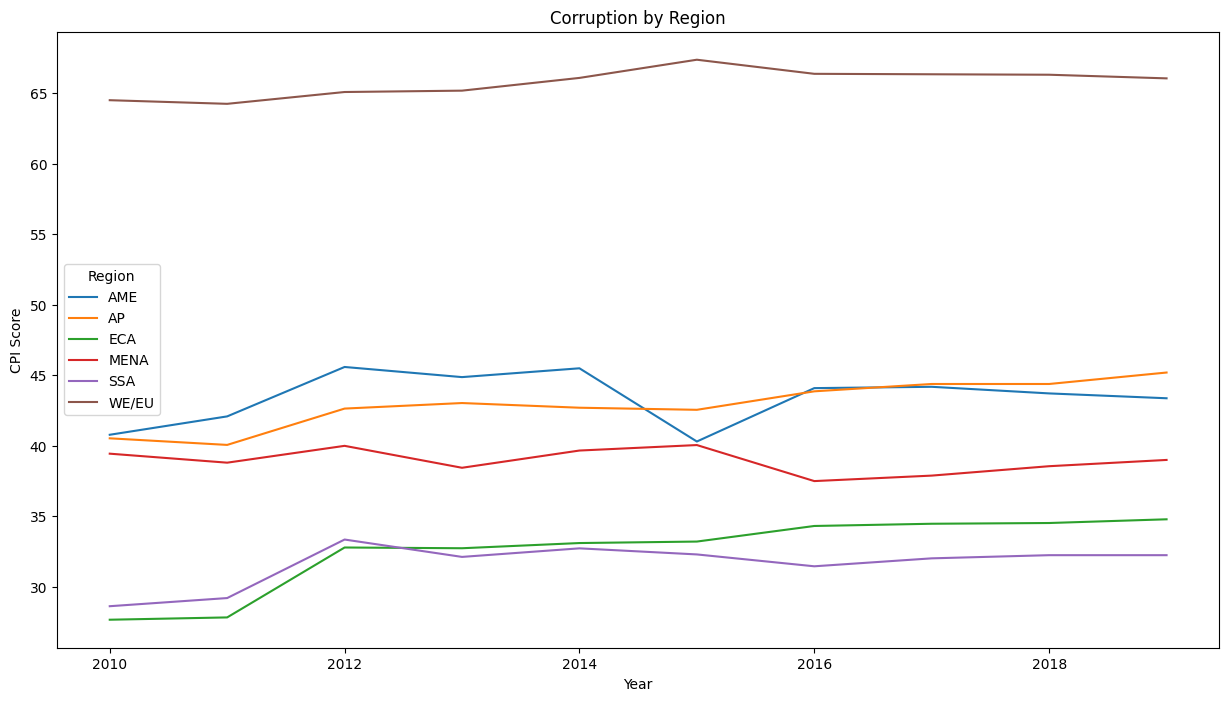

In [21]:
avg_scores_by_year_region = corruption_df.groupby(['Year', 'Region'])['CPI Score'].mean().reset_index()
fig = plt.figure(figsize=(15, 8))
sns.lineplot(x='Year', y='CPI Score', hue='Region', data=avg_scores_by_year_region).set_title("Corruption by Region")

The Western Europe & European Union region have the highest (by a large margin) average anti-corruption score(CPI).

Europe, Central Asia & Sub-saharan Africa are doing poorly on the CPI score and need to strengthen their anti-corruption laws.


Biggest gainers & losers over the decade

In [22]:
first_and_last_decade = corruption_df[corruption_df['Year'].isin([2010, 2019])][['Year', 'Country', 'CPI Score']]
pivoted = first_and_last_decade.pivot_table(values='CPI Score', index='Country', columns='Year').reset_index()

pivoted['Diff'] = pivoted[2019] - pivoted[2010]
gainers = pivoted.nlargest(n=5, columns='Diff')
losers = pivoted.nsmallest(n=5, columns='Diff')


Text(0.5, 1.0, 'Biggest Gainers')

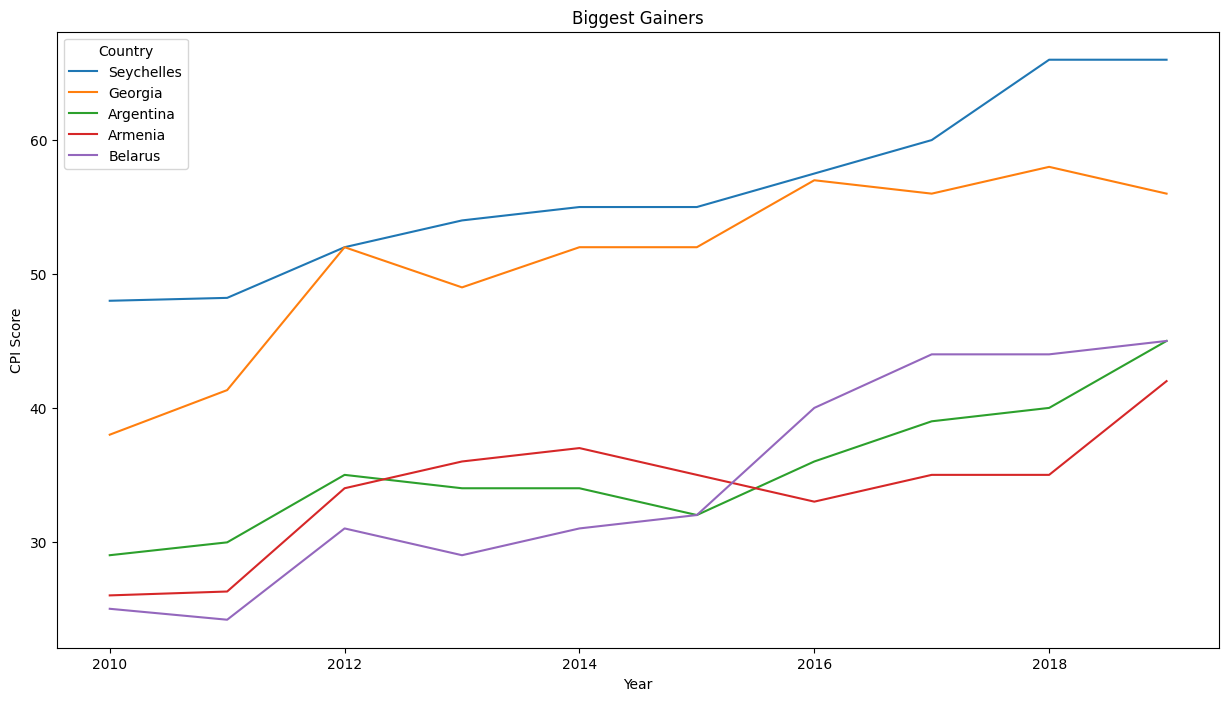

In [23]:
fig = plt.figure(figsize=(15, 8))
gainer_df = corruption_df[corruption_df['Country'].isin(gainers['Country'])]
sns.lineplot(x='Year', y='CPI Score', hue='Country', data=gainer_df).set_title("Biggest Gainers")

Text(0.5, 1.0, 'Biggest Losers')

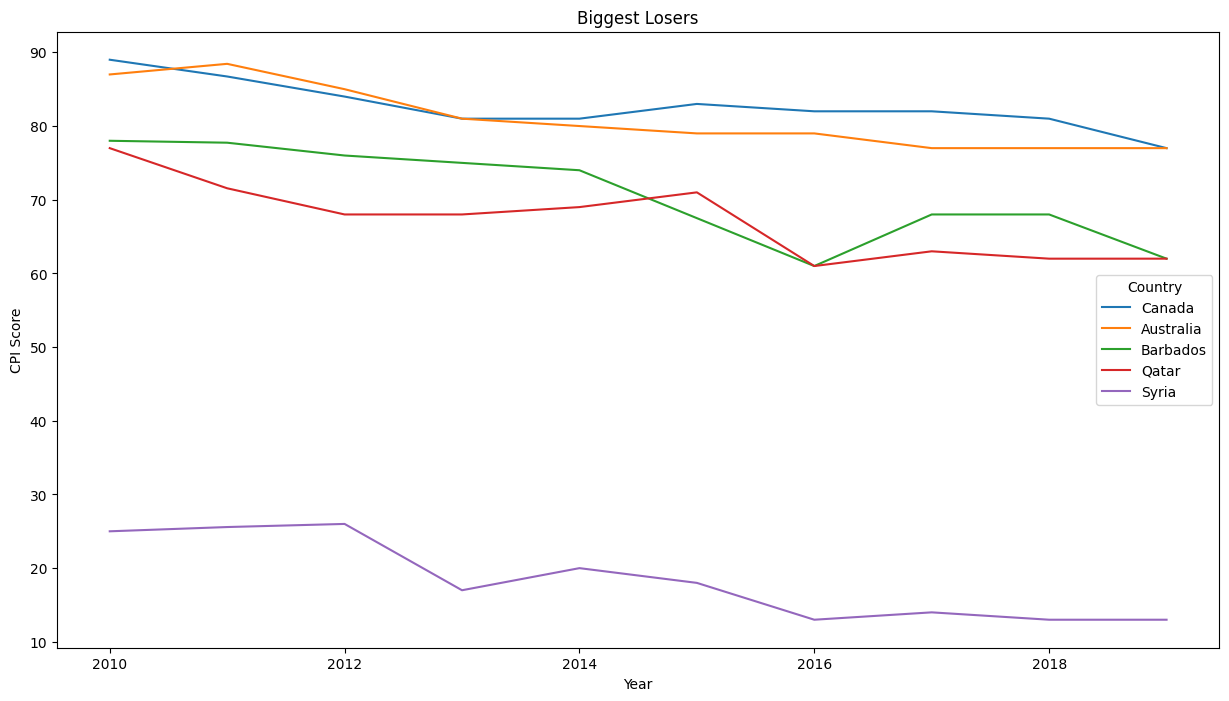

In [24]:
fig = plt.figure(figsize=(15, 8))
loser_df = corruption_df[corruption_df['Country'].isin(losers['Country'])]
sns.lineplot(x='Year', y='CPI Score', hue='Country', data=loser_df).set_title("Biggest Losers")

Countries like Belarus, Georgia, Seychelles, Argentina, Armenia have the highest growth in the decade based on the CPI score.

Countries like Barbados, Qatar, Canada, Syria, Australia have the highest decay in the decade based on the CPI score.